# US Census Analysis

## 1) Load the train and test files

In [1]:
import warnings
warnings.filterwarnings('ignore')
import preprocessing_census

In [2]:
train, test = preprocessing_census.open_datasets()

## 2) Exploratory analysis on the data & relevant visualisations

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising "Income" column

In [4]:
col = "income"
ratio_count = pd.DataFrame(train[col].value_counts(dropna=False))
ratio_count["ratio"] = ratio_count/ratio_count.sum()
ratio_count["counts"] = ratio_count[col]
ratio_count[col] = ratio_count.index
ratio_count.sort_values('ratio',ascending=False,inplace=True)
fig = px.bar(ratio_count, x=col, y='counts')
fig.show()
display(ratio_count)

income     ratio  counts
0       0  0.937942  187141
1       1  0.062058   12382

The "Income" column is <b>very imbalanced</b>, using a naive model always predicting "-50000" would result in the following confusion matrice<br>
[[93576   919]<br/>
 [ 6186  0]]<br/><br/>
Achieving an accuracy of <b>0.937</b>.<br>
The goal of our models will be to predict better than this naive model.

### Analyzing categorical type data

In [33]:
def plot_categorical_ratios(df):
    for col in df.columns:
        dtype = str(df[col].dtype)
        if dtype == "object":
            print(col)
            ratio_count = pd.DataFrame(train[col].value_counts(dropna=False))
            ratio_count["ratio"] = ratio_count/ratio_count.sum()
            ratio_count["counts"] = ratio_count[col]
            ratio_count["mean_incopme"] = train.groupby(col)["income"].mean()
            ratio_count[col] = ratio_count.index
            ratio_count.sort_values('ratio',ascending=False,inplace=True)
            plt.figure(figsize=(10,10))
            chart = sns.countplot(x=col, hue="income", data=train)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
            plt.show()
            display(ratio_count)

class_of_worker


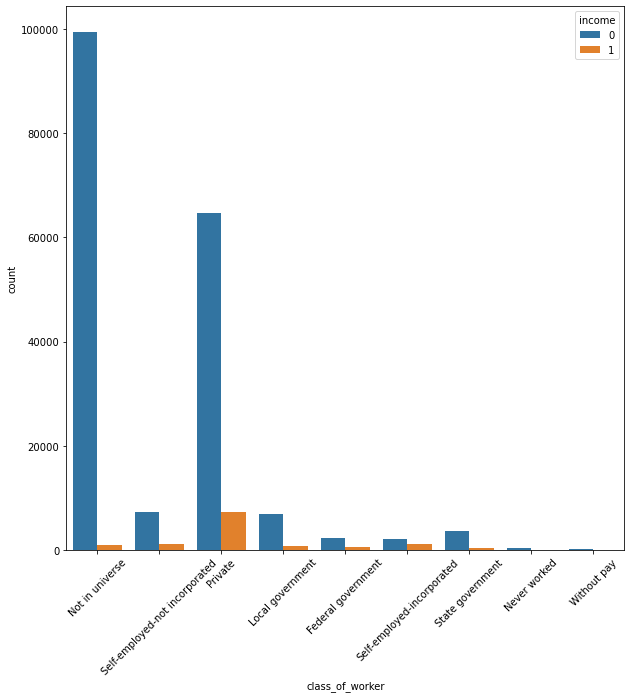

class_of_worker     ratio  \
Not in universe                                Not in universe  0.502423   
Private                                                Private  0.361001   
Self-employed-not incorporated  Self-employed-not incorporated  0.042326   
Local government                              Local government  0.039013   
State government                              State government  0.021186   
Self-employed-incorporated          Self-employed-incorporated  0.016364   
Federal government                          Federal government  0.014660   
Never worked                                      Never worked  0.002200   
Without pay                                        Without pay  0.000827   

                                counts  mean_incopme  
Not in universe                 100245      0.009018  
Private                          72028      0.101655  
Self-employed-not incorporated    8445      0.129070  
Local government                  7784      0.108813  
State government                  4227      0.114739  
Self-employed-incorporated        3265      0.347320  
Federal government                2925      0.204103  
Never worked                       439      0.004556  
Without pay                        165      0.006061

education


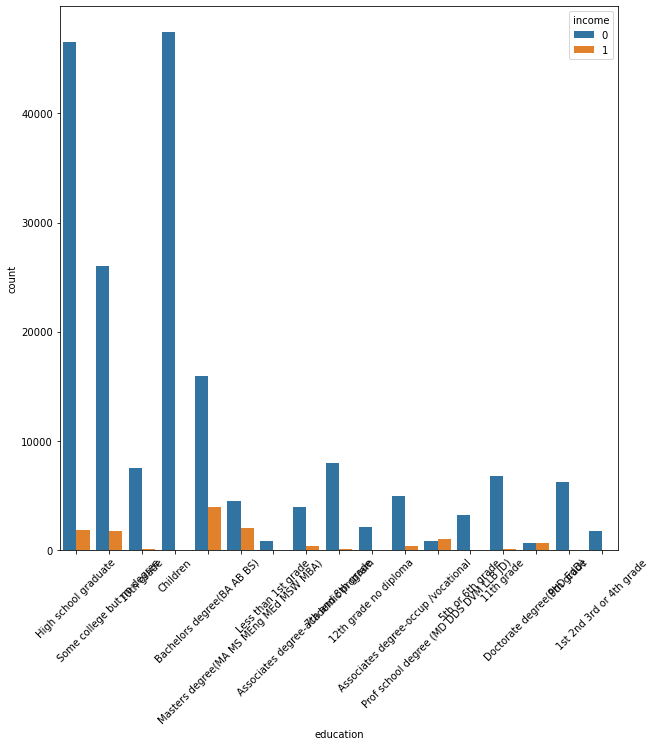

education  \
High school graduate                                      High school graduate   
Children                                                              Children   
Some college but no degree                          Some college but no degree   
Bachelors degree(BA AB BS)                          Bachelors degree(BA AB BS)   
7th and 8th grade                                            7th and 8th grade   
10th grade                                                          10th grade   
11th grade                                                          11th grade   
Masters degree(MA MS MEng MEd MSW MBA)  Masters degree(MA MS MEng MEd MSW MBA)   
9th grade                                                            9th grade   
Associates degree-occup /vocational        Associates degree-occup /vocational   
Associates degree-academic program          Associates degree-academic program   
5th or 6th grade                                              5th or 6th grade   
12th grade no diploma                                    12th grade no diploma   
1st 2nd 3rd or 4th grade                              1st 2nd 3rd or 4th grade   
Prof school degree (MD DDS DVM LLB JD)  Prof school degree (MD DDS DVM LLB JD)   
Doctorate degree(PhD EdD)                            Doctorate degree(PhD EdD)   
Less than 1st grade                                        Less than 1st grade   

                                           ratio  counts  mean_incopme  
High school graduate                    0.242614   48407      0.038817  
Children                                0.237677   47422      0.000000  
Some college but no degree              0.139433   27820      0.064234  
Bachelors degree(BA AB BS)              0.099562   19865      0.197080  
7th and 8th grade                       0.040131    8007      0.008992  
10th grade                              0.037875    7557      0.008204  
11th grade                              0.034462    6876      0.010180  
Masters degree(MA MS MEng MEd MSW MBA)  0.032783    6541      0.311573  
9th grade                               0.031224    6230      0.006100  
Associates degree-occup /vocational     0.026854    5358      0.077081  
Associates degree-academic program      0.021867    4363      0.094430  
5th or 6th grade                        0.016424    3277      0.006713  
12th grade no diploma                   0.010655    2126      0.015992  
1st 2nd 3rd or 4th grade                0.009017    1799      0.007226  
Prof school degree (MD DDS DVM LLB JD)  0.008986    1793      0.540435  
Doctorate degree(PhD EdD)               0.006330    1263      0.520190  
Less than 1st grade                     0.004105     819      0.001221

enroll_in_edu_inst_last_wk


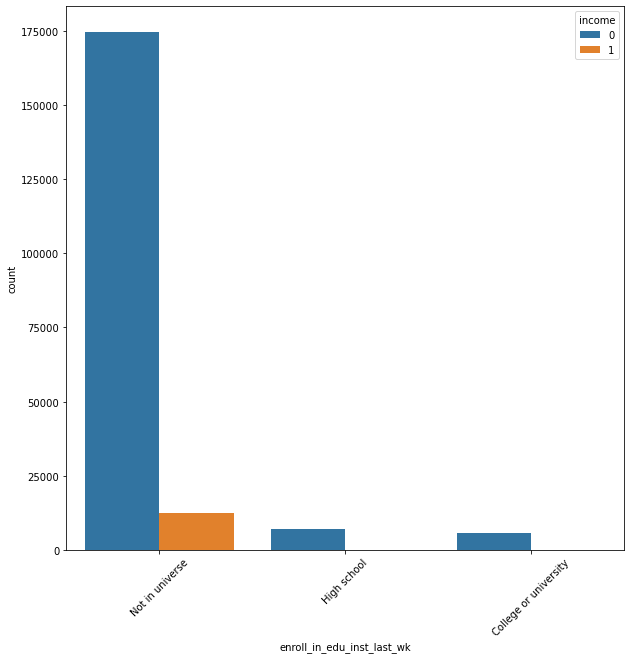

enroll_in_edu_inst_last_wk     ratio  counts  \
Not in universe                  Not in universe  0.936950  186943   
High school                          High school  0.034542    6892   
College or university      College or university  0.028508    5688   

                       mean_incopme  
Not in universe            0.066074  
High school                0.000725  
College or university      0.004395

marital_stat


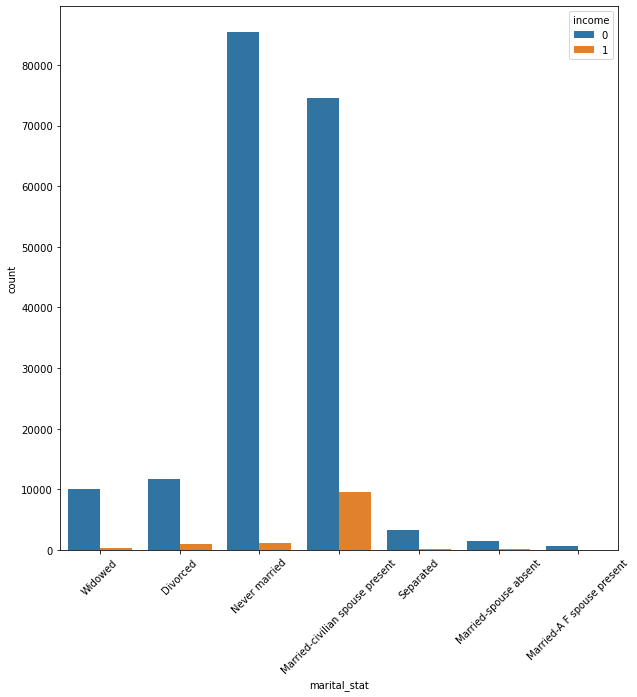

marital_stat     ratio  \
Never married                                      Never married  0.433459   
Married-civilian spouse present  Married-civilian spouse present  0.422117   
Divorced                                                Divorced  0.063702   
Widowed                                                  Widowed  0.052440   
Separated                                              Separated  0.017341   
Married-spouse absent                      Married-spouse absent  0.007608   
Married-A F spouse present            Married-A F spouse present  0.003333   

                                 counts  mean_incopme  
Never married                     86485      0.012916  
Married-civilian spouse present   84222      0.113984  
Divorced                          12710      0.083871  
Widowed                           10463      0.031540  
Separated                          3460      0.045665  
Married-spouse absent              1518      0.063241  
Married-A F spouse present          665      0.022556

major_industry_code


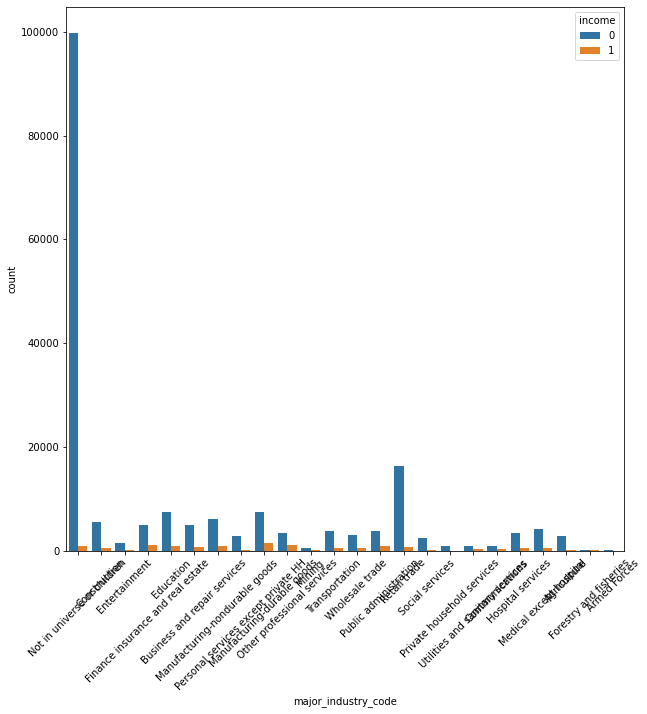

major_industry_code  \
Not in universe or children                  Not in universe or children   
Retail trade                                                Retail trade   
Manufacturing-durable goods                  Manufacturing-durable goods   
Education                                                      Education   
Manufacturing-nondurable goods            Manufacturing-nondurable goods   
Finance insurance and real estate      Finance insurance and real estate   
Construction                                                Construction   
Business and repair services                Business and repair services   
Medical except hospital                          Medical except hospital   
Public administration                              Public administration   
Other professional services                  Other professional services   
Transportation                                            Transportation   
Hospital services                                      Hospital services   
Wholesale trade                                          Wholesale trade   
Agriculture                                                  Agriculture   
Personal services except private HH  Personal services except private HH   
Social services                                          Social services   
Entertainment                                              Entertainment   
Communications                                            Communications   
Utilities and sanitary services          Utilities and sanitary services   
Private household services                    Private household services   
Mining                                                            Mining   
Forestry and fisheries                            Forestry and fisheries   
Armed Forces                                                Armed Forces   

                                        ratio  counts  mean_incopme  
Not in universe or children          0.504624  100684      0.008998  
Retail trade                         0.085554   17070      0.046221  
Manufacturing-durable goods          0.045183    9015      0.165724  
Education                            0.041514    8283      0.107570  
Manufacturing-nondurable goods       0.034567    6897      0.124112  
Finance insurance and real estate    0.030798    6145      0.182099  
Construction                         0.029992    5984      0.089071  
Business and repair services         0.028323    5651      0.109538  
Medical except hospital              0.023471    4683      0.128123  
Public administration                0.023105    4610      0.179393  
Other professional services          0.022464    4482      0.232932  
Transportation                       0.021095    4209      0.113091  
Hospital services                    0.019867    3964      0.122351  
Wholesale trade                      0.018023    3596      0.153504  
Agriculture                          0.015151    3023      0.058882  
Personal services except private HH  0.014720    2937      0.035751  
Social services                      0.012775    2549      0.032954  
Entertainment                        0.008275    1651      0.068443  
Communications                       0.005919    1181      0.228620  
Utilities and sanitary services      0.005904    1178      0.217317  
Private household services           0.004736     945      0.005291  
Mining                               0.002822     563      0.259325  
Forestry and fisheries               0.000937     187      0.139037  
Armed Forces                         0.000180      36      0.222222

major_occupation_code


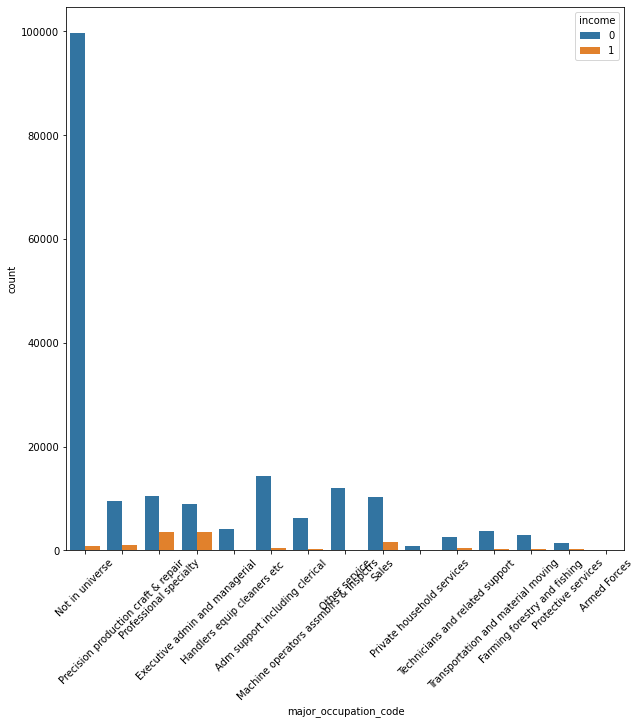

major_occupation_code  \
Not in universe                                              Not in universe   
Adm support including clerical                Adm support including clerical   
Professional specialty                                Professional specialty   
Executive admin and managerial                Executive admin and managerial   
Other service                                                  Other service   
Sales                                                                  Sales   
Precision production craft & repair      Precision production craft & repair   
Machine operators assmblrs & inspctrs  Machine operators assmblrs & inspctrs   
Handlers equip cleaners etc                     Handlers equip cleaners etc    
Transportation and material moving        Transportation and material moving   
Farming forestry and fishing                    Farming forestry and fishing   
Technicians and related support              Technicians and related support   
Protective services                                      Protective services   
Private household services                        Private household services   
Armed Forces                                                    Armed Forces   

                                          ratio  counts  mean_incopme  
Not in universe                        0.504624  100684      0.008998  
Adm support including clerical         0.074362   14837      0.030060  
Professional specialty                 0.069867   13940      0.249283  
Executive admin and managerial         0.062624   12495      0.287555  
Other service                          0.060640   12099      0.009918  
Sales                                  0.059056   11783      0.129339  
Precision production craft & repair    0.052716   10518      0.090797  
Machine operators assmblrs & inspctrs  0.031971    6379      0.036840  
Handlers equip cleaners etc            0.020684    4127      0.019142  
Transportation and material moving     0.020148    4020      0.064428  
Farming forestry and fishing           0.015768    3146      0.050858  
Technicians and related support        0.015126    3018      0.119616  
Protective services                    0.008325    1661      0.155930  
Private household services             0.003909     780      0.002564  
Armed Forces                           0.000180      36      0.222222

race


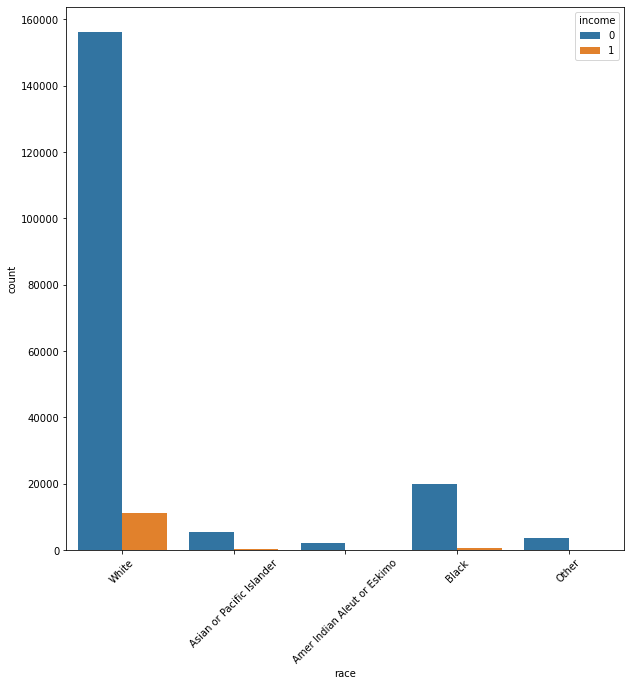

race     ratio  counts  \
White                                              White  0.838826  167365   
Black                                              Black  0.102319   20415   
Asian or Pacific Islander      Asian or Pacific Islander  0.029245    5835   
Other                                              Other  0.018329    3657   
Amer Indian Aleut or Eskimo  Amer Indian Aleut or Eskimo  0.011282    2251   

                             mean_incopme  
White                            0.067350  
Black                            0.026451  
Asian or Pacific Islander        0.073693  
Other                            0.024884  
Amer Indian Aleut or Eskimo      0.021768

hispanic_origin


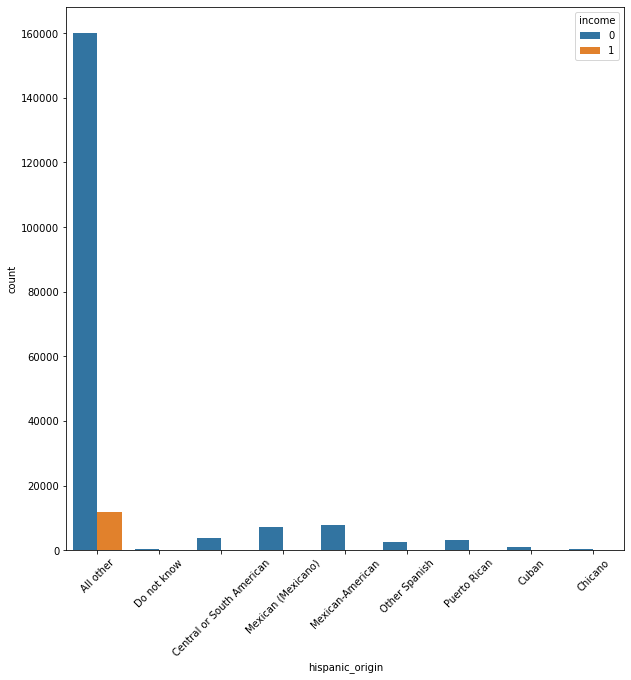

hispanic_origin     ratio  counts  \
All other                                  All other  0.861590  171907   
Mexican-American                    Mexican-American  0.040492    8079   
Mexican (Mexicano)                Mexican (Mexicano)  0.036256    7234   
Central or South American  Central or South American  0.019522    3895   
Puerto Rican                            Puerto Rican  0.016605    3313   
Other Spanish                          Other Spanish  0.012455    2485   
Cuban                                          Cuban  0.005643    1126   
NaN                                              NaN  0.004380     874   
Do not know                              Do not know  0.001534     306   
Chicano                                      Chicano  0.001524     304   

                           mean_incopme  
All other                      0.068450  
Mexican-American               0.021290  
Mexican (Mexicano)             0.011335  
Central or South American      0.020539  
Puerto Rican                   0.020525  
Other Spanish                  0.032596  
Cuban                          0.054174  
NaN                                 NaN  
Do not know                    0.026144  
Chicano                        0.019737

sex


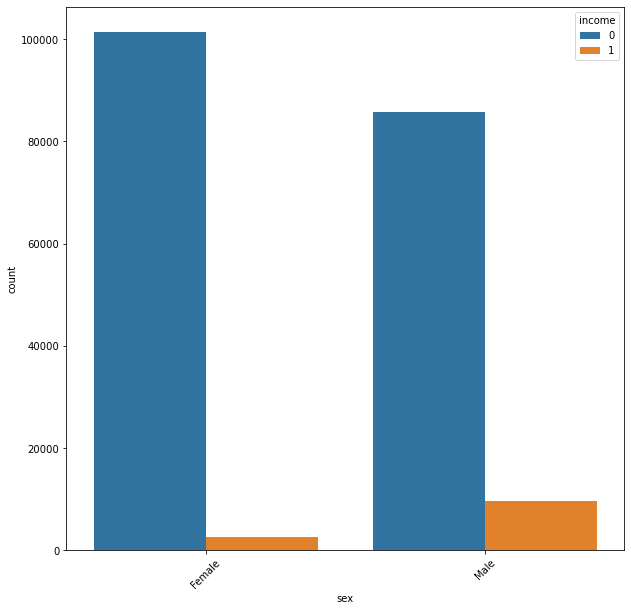

sex     ratio  counts  mean_incopme
Female  Female  0.521163  103984      0.025610
Male      Male  0.478837   95539      0.101728

member_of_a_labor_union


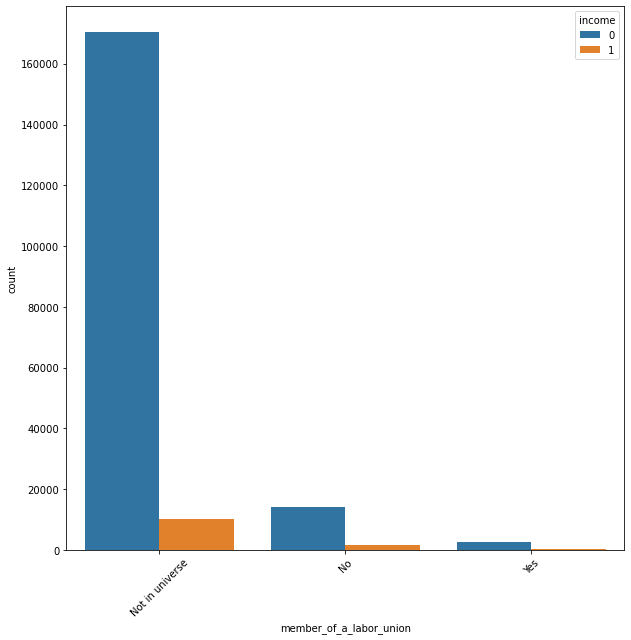

member_of_a_labor_union     ratio  counts  mean_incopme
Not in universe         Not in universe  0.904452  180459      0.056234
No                                   No  0.080362   16034      0.113634
Yes                                 Yes  0.015186    3030      0.135974

reason_for_unemployment


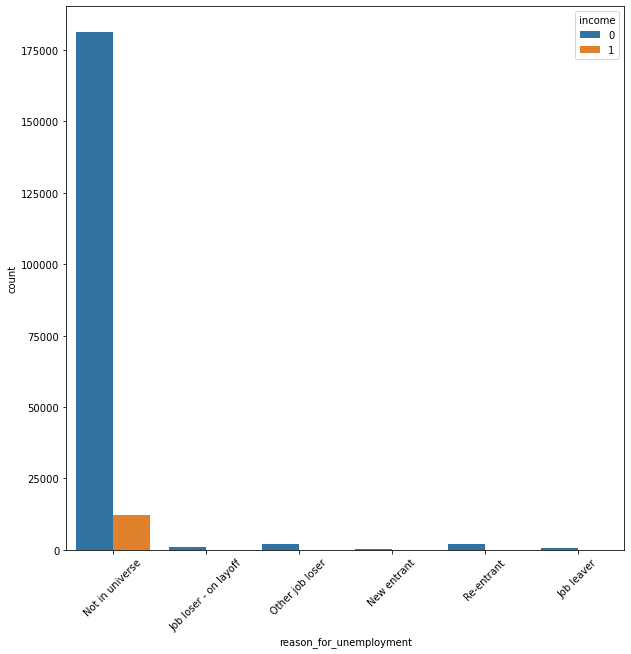

reason_for_unemployment     ratio  counts  mean_incopme
Not in universe               Not in universe  0.969577  193453      0.063126
Other job loser               Other job loser  0.010214    2038      0.048577
Re-entrant                         Re-entrant  0.010119    2019      0.011392
Job loser - on layoff   Job loser - on layoff  0.004892     976      0.022541
Job leaver                         Job leaver  0.002997     598      0.040134
New entrant                       New entrant  0.002200     439      0.004556

full_or_part_time_employment_stat


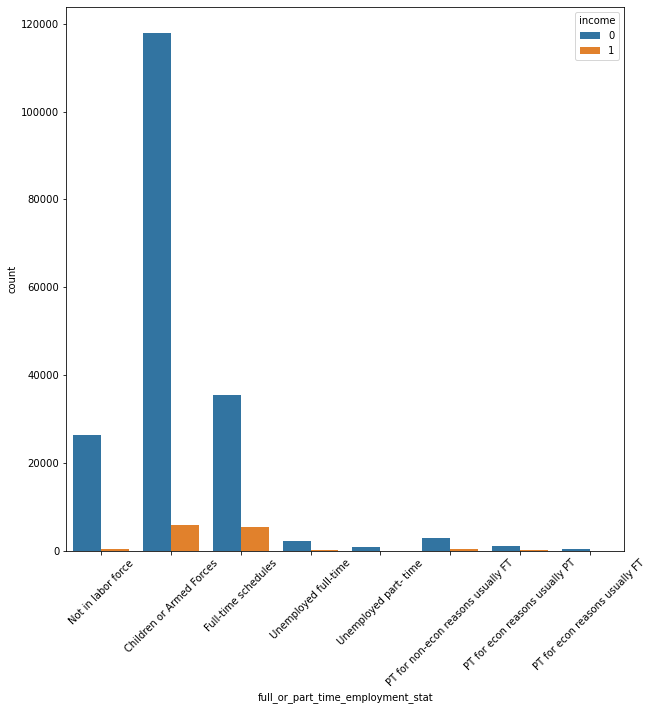

full_or_part_time_employment_stat  \
Children or Armed Forces                      Children or Armed Forces   
Full-time schedules                                Full-time schedules   
Not in labor force                                  Not in labor force   
PT for non-econ reasons usually FT  PT for non-econ reasons usually FT   
Unemployed full-time                              Unemployed full-time   
PT for econ reasons usually PT          PT for econ reasons usually PT   
Unemployed part- time                            Unemployed part- time   
PT for econ reasons usually FT          PT for econ reasons usually FT   

                                       ratio  counts  mean_incopme  
Children or Armed Forces            0.620324  123769      0.047459  
Full-time schedules                 0.204167   40736      0.131726  
Not in labor force                  0.134360   26808      0.017234  
PT for non-econ reasons usually FT  0.016650    3322      0.118302  
Unemployed full-time                0.011583    2311      0.035915  
PT for econ reasons usually PT      0.006059    1209      0.128205  
Unemployed part- time               0.004225     843      0.021352  
PT for econ reasons usually FT      0.002631     525      0.059048

tax_filer_status


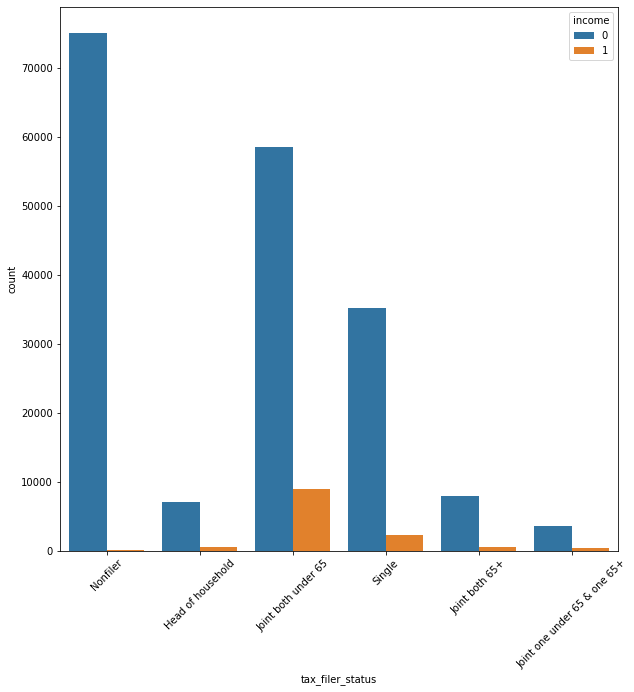

tax_filer_status     ratio  counts  \
Nonfiler                                          Nonfiler  0.376368   75094   
Joint both under 65                    Joint both under 65  0.337720   67383   
Single                                              Single  0.187552   37421   
Joint both 65+                              Joint both 65+  0.041760    8332   
Head of household                        Head of household  0.037219    7426   
Joint one under 65 & one 65+  Joint one under 65 & one 65+  0.019381    3867   

                              mean_incopme  
Nonfiler                          0.000466  
Joint both under 65               0.131383  
Single                            0.061329  
Joint both 65+                    0.054009  
Head of household                 0.060329  
Joint one under 65 & one 65+      0.077838

region_of_previous_residence


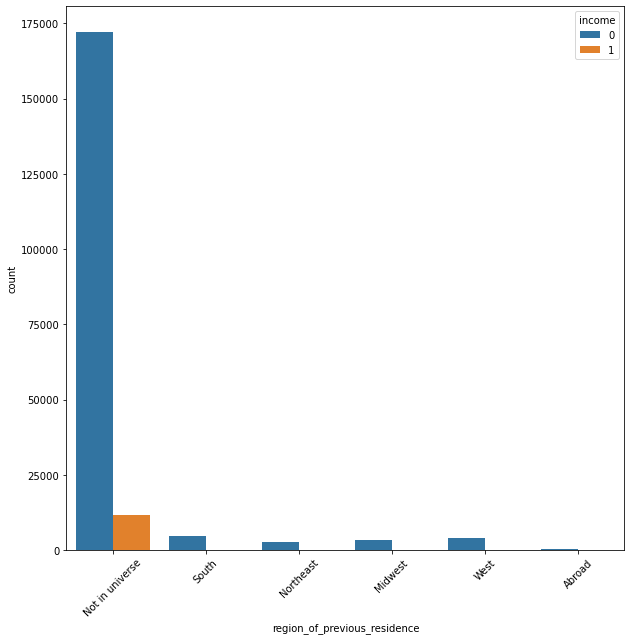

region_of_previous_residence     ratio  counts  mean_incopme
Not in universe              Not in universe  0.920946  183750      0.064022
South                                  South  0.024503    4889      0.037636
West                                    West  0.020419    4074      0.039273
Midwest                              Midwest  0.017918    3575      0.030490
Northeast                          Northeast  0.013557    2705      0.054344
Abroad                                Abroad  0.002656     530      0.033962

state_of_previous_residence


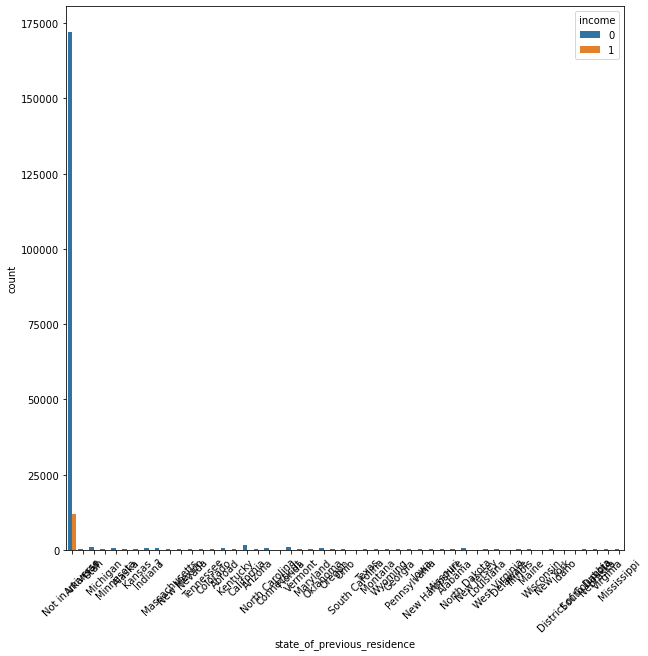

state_of_previous_residence     ratio  counts  \
Not in universe                  Not in universe  0.920946  183750   
California                            California  0.008590    1714   
Utah                                        Utah  0.005328    1063   
Florida                                  Florida  0.004255     849   
North Carolina                    North Carolina  0.004070     812   
?                                              ?  0.003548     708   
Abroad                                    Abroad  0.003363     671   
Oklahoma                                Oklahoma  0.003137     626   
Minnesota                              Minnesota  0.002887     576   
Indiana                                  Indiana  0.002671     533   
North Dakota                        North Dakota  0.002501     499   
New Mexico                            New Mexico  0.002321     463   
Michigan                                Michigan  0.002210     441   
Alaska                                    Alaska  0.001453     290   
Kentucky                                Kentucky  0.001223     244   
Arizona                                  Arizona  0.001218     243   
New Hampshire                      New Hampshire  0.001213     242   
Wyoming                                  Wyoming  0.001208     241   
Colorado                                Colorado  0.001198     239   
Oregon                                    Oregon  0.001183     236   
West Virginia                      West Virginia  0.001158     231   
Georgia                                  Georgia  0.001138     227   
Montana                                  Montana  0.001133     226   
Alabama                                  Alabama  0.001083     216   
Ohio                                        Ohio  0.001058     211   
Texas                                      Texas  0.001047     209   
Arkansas                                Arkansas  0.001027     205   
Mississippi                          Mississippi  0.001022     204   
Tennessee                              Tennessee  0.001012     202   
Pennsylvania                        Pennsylvania  0.000997     199   
New York                                New York  0.000977     195   
Louisiana                              Louisiana  0.000962     192   
Vermont                                  Vermont  0.000957     191   
Iowa                                        Iowa  0.000947     189   
Illinois                                Illinois  0.000902     180   
Nebraska                                Nebraska  0.000892     178   
Missouri                                Missouri  0.000877     175   
Nevada                                    Nevada  0.000872     174   
Maine                                      Maine  0.000837     167   
Massachusetts                      Massachusetts  0.000757     151   
Kansas                                    Kansas  0.000747     149   
South Dakota                        South Dakota  0.000692     138   
Maryland                                Maryland  0.000682     136   
Virginia                                Virginia  0.000632     126   
Connecticut                          Connecticut  0.000586     117   
District of Columbia        District of Columbia  0.000581     116   
Wisconsin                              Wisconsin  0.000526     105   
South Carolina                    South Carolina  0.000476      95   
New Jersey                            New Jersey  0.000376      75   
Delaware                                Delaware  0.000366      73   
Idaho                                      Idaho  0.000155      31   

                      mean_incopme  
Not in universe           0.064022  
California                0.039090  
Utah                      0.029163  
Florida                   0.035336  
North Carolina            0.052956  
?                         0.063559  
Abroad                    0.034277  
Oklahoma                  0.031949  
Minnesota                 0.034722  
Indiana   

detailed_household_and_family_stat


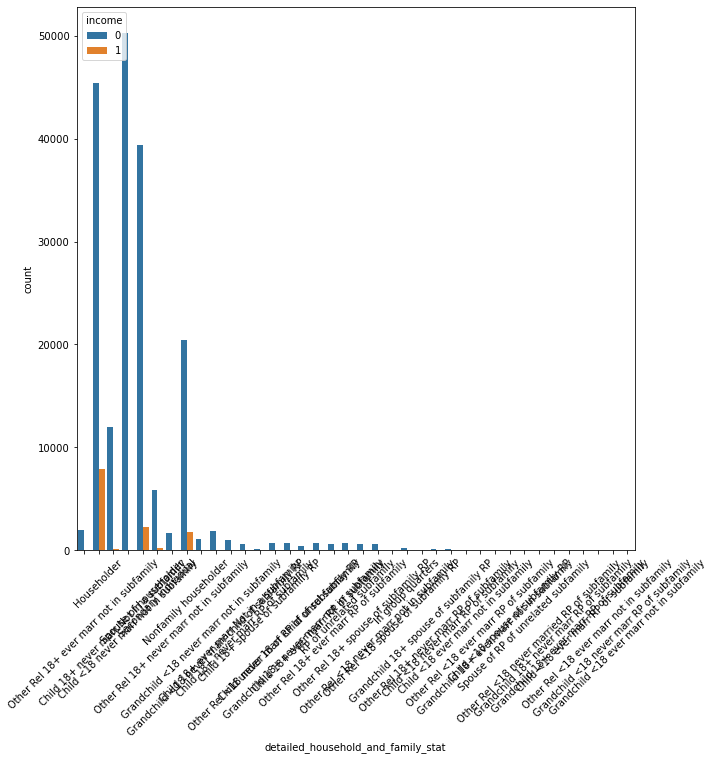

detailed_household_and_family_stat  \
Householder                                                                          Householder   
Child <18 never marr not in subfamily                      Child <18 never marr not in subfamily   
Spouse of householder                                                      Spouse of householder   
Nonfamily householder                                                      Nonfamily householder   
Child 18+ never marr Not in a subfamily                  Child 18+ never marr Not in a subfamily   
Secondary individual                                                        Secondary individual   
Other Rel 18+ ever marr not in subfamily                Other Rel 18+ ever marr not in subfamily   
Grandchild <18 never marr child of subfamily RP  Grandchild <18 never marr child of subfamily RP   
Other Rel 18+ never marr not in subfamily              Other Rel 18+ never marr not in subfamily   
Grandchild <18 never marr not in subfamily            Grandchild <18 never marr not in subfamily   
Child 18+ ever marr Not in a subfamily                    Child 18+ ever marr Not in a subfamily   
Child under 18 of RP of unrel subfamily                  Child under 18 of RP of unrel subfamily   
RP of unrelated subfamily                                              RP of unrelated subfamily   
Child 18+ ever marr RP of subfamily                          Child 18+ ever marr RP of subfamily   
Other Rel 18+ ever marr RP of subfamily                  Other Rel 18+ ever marr RP of subfamily   
Other Rel <18 never marr child of subfamily RP    Other Rel <18 never marr child of subfamily RP   
Other Rel 18+ spouse of subfamily RP                        Other Rel 18+ spouse of subfamily RP   
Child 18+ never marr RP of subfamily                        Child 18+ never marr RP of subfamily   
Other Rel <18 never marr not in subfamily              Other Rel <18 never marr not in subfamily   
Grandchild 18+ never marr not in subfamily            Grandchild 18+ never marr not in subfamily   
In group quarters                                                              In group quarters   
Child 18+ spouse of subfamily RP                                Child 18+ spouse of subfamily RP   
Other Rel 18+ never marr RP of subfamily                Other Rel 18+ never marr RP of subfamily   
Child <18 never marr RP of subfamily                        Child <18 never marr RP of subfamily   
Spouse of RP of unrelated subfamily                          Spouse of RP of unrelated subfamily   
Child <18 ever marr not in subfamily                        Child <18 ever marr not in subfamily   
Grandchild 18+ ever marr not in subfamily              Grandchild 18+ ever marr not in subfamily   
Grandchild 18+ spouse of subfamily RP                      Grandchild 18+ spouse of subfamily RP   
Child <18 ever marr RP of subfamily                          Child <18 ever marr RP of subfamily   
Grandchild 18+ ever marr RP of subfamily                Grandchild 18+ ever marr RP of subfamily   
Other Rel <18 ever marr RP of subfamily                  Other Rel <18 ever marr RP of subfamily   
Grandchild 18+ never marr RP of subfamily              Grandchild 18+ never marr RP of subfamily   
Other Rel <18 never married RP of subfamily          Other Rel <18 never married RP of subfamily   
Other Rel <18 spouse of subfamily RP                        Other Rel <18 spouse of subfamily RP   
Child <18 spouse of subfamily RP                                Child <18 spouse of subfamily RP   
Grandchild <18 ever marr not in subfamily              Grandchild <18 ever marr not in subfamily   
Grandchild <18 never marr RP of subfamily              Grandchild <18 never marr RP of subfamily   
Other Rel <18 ever marr not in subfamily                Other Rel <18 ever marr not in subfamily   

                                                    ratio  counts  \
Householder                                      0.266877   53248   
Child <18 never marr no

detailed_household_summary_in_household


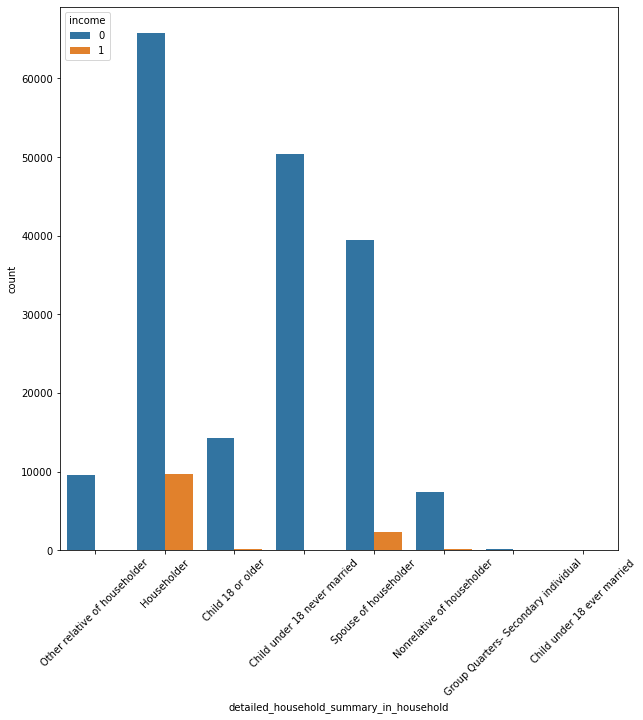

detailed_household_summary_in_household  \
Householder                                                      Householder   
Child under 18 never married                    Child under 18 never married   
Spouse of householder                                  Spouse of householder   
Child 18 or older                                          Child 18 or older   
Other relative of householder                  Other relative of householder   
Nonrelative of householder                        Nonrelative of householder   
Group Quarters- Secondary individual    Group Quarters- Secondary individual   
Child under 18 ever married                      Child under 18 ever married   

                                         ratio  counts  mean_incopme  
Householder                           0.378277   75475      0.127870  
Child under 18 never married          0.252733   50426      0.000040  
Spouse of householder                 0.209044   41709      0.054712  
Child 18 or older                     0.072322   14430      0.008732  
Other relative of householder         0.048631    9703      0.008863  
Nonrelative of householder            0.038096    7601      0.030785  
Group Quarters- Secondary individual  0.000662     132      0.007576  
Child under 18 ever married           0.000236      47      0.000000

migration_code-change_in_msa


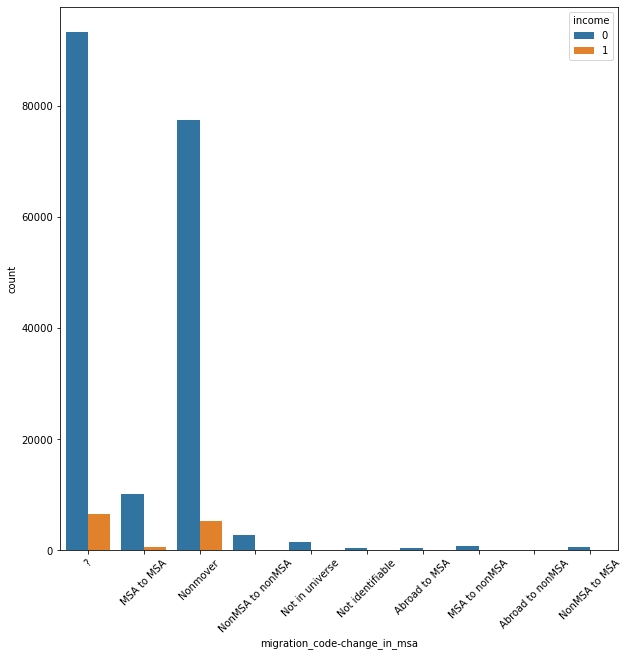

migration_code-change_in_msa     ratio  counts  mean_incopme
?                                           ?  0.499672   99696      0.065630
Nonmover                             Nonmover  0.413677   82538      0.063256
MSA to MSA                         MSA to MSA  0.053132   10601      0.045467
NonMSA to nonMSA             NonMSA to nonMSA  0.014089    2811      0.017787
Not in universe               Not in universe  0.007598    1516      0.000000
MSA to nonMSA                   MSA to nonMSA  0.003959     790      0.030380
NonMSA to MSA                   NonMSA to MSA  0.003082     615      0.043902
Abroad to MSA                   Abroad to MSA  0.002270     453      0.039735
Not identifiable             Not identifiable  0.002155     430      0.039535
Abroad to nonMSA             Abroad to nonMSA  0.000366      73      0.000000

migration_code-change_in_reg


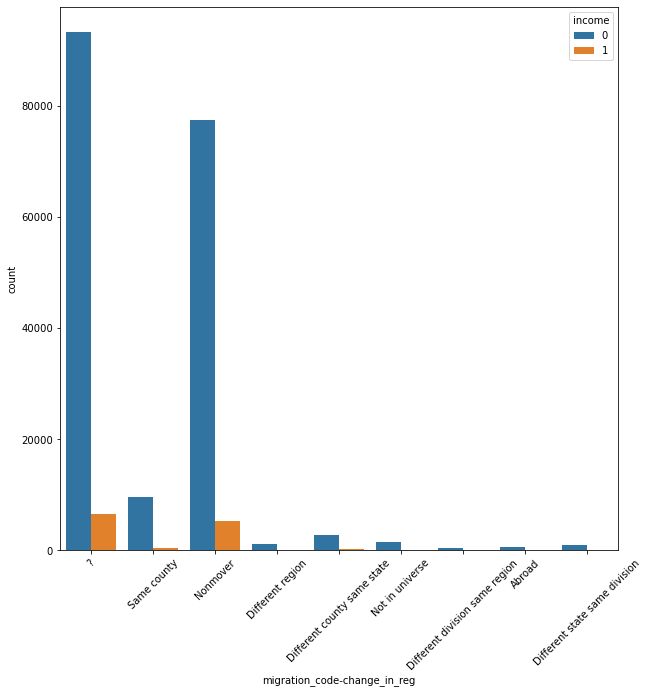

migration_code-change_in_reg     ratio  \
?                                                            ?  0.499672   
Nonmover                                              Nonmover  0.413677   
Same county                                        Same county  0.049177   
Different county same state        Different county same state  0.014018   
Not in universe                                Not in universe  0.007598   
Different region                              Different region  0.005904   
Different state same division    Different state same division  0.004967   
Abroad                                                  Abroad  0.002656   
Different division same region  Different division same region  0.002331   

                                counts  mean_incopme  
?                                99696      0.065630  
Nonmover                         82538      0.063256  
Same county                       9812      0.033428  
Different county same state       2797      0.045406  
Not in universe                   1516      0.000000  
Different region                  1178      0.063667  
Different state same division      991      0.045409  
Abroad                             530      0.033962  
Different division same region     465      0.053763

migration_code-move_within_reg


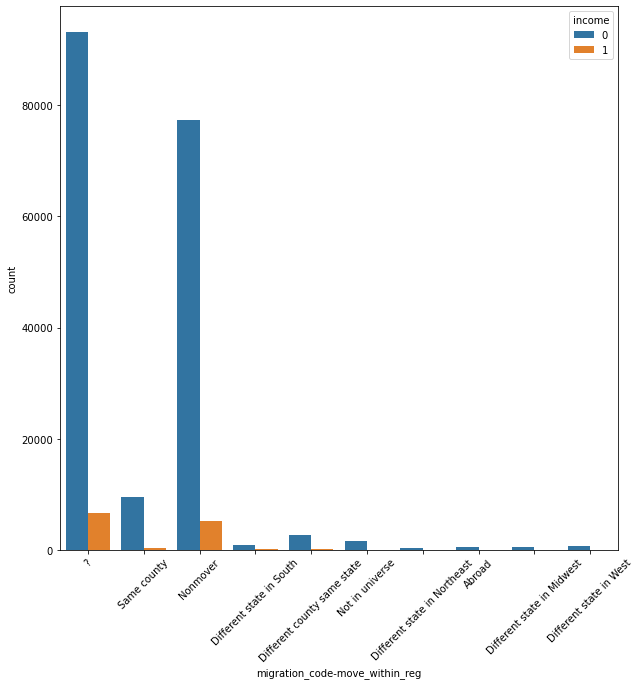

migration_code-move_within_reg     ratio  counts  \
?                                                         ?  0.499672   99696   
Nonmover                                           Nonmover  0.413677   82538   
Same county                                     Same county  0.049177    9812   
Different county same state     Different county same state  0.014018    2797   
Not in universe                             Not in universe  0.007598    1516   
Different state in South           Different state in South  0.004877     973   
Different state in West             Different state in West  0.003403     679   
Different state in Midwest       Different state in Midwest  0.002762     551   
Abroad                                               Abroad  0.002656     530   
Different state in Northeast   Different state in Northeast  0.002160     431   

                              mean_incopme  
?                                 0.065630  
Nonmover                          0.063256  
Same county                       0.033428  
Different county same state       0.045406  
Not in universe                   0.000000  
Different state in South          0.062693  
Different state in West           0.047128  
Different state in Midwest        0.045372  
Abroad                            0.033962  
Different state in Northeast      0.062645

live_in_this_house_1_year_ago


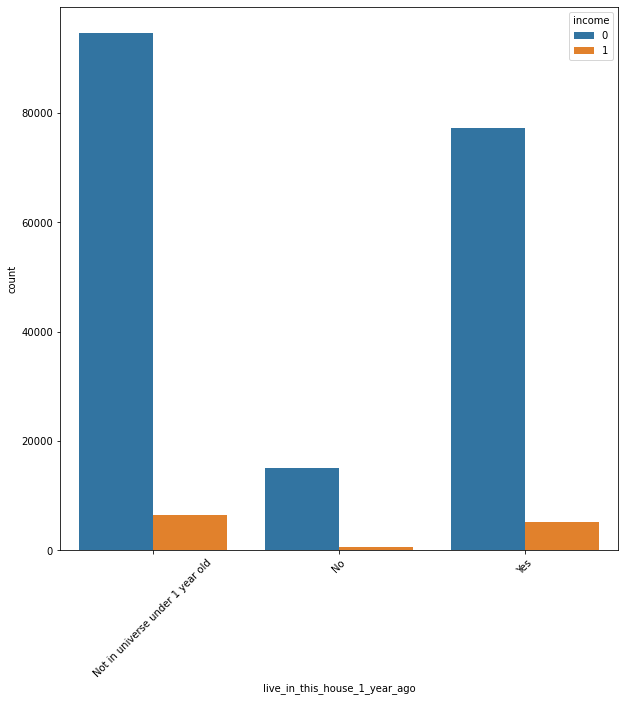

live_in_this_house_1_year_ago     ratio  \
Not in universe under 1 year old  Not in universe under 1 year old  0.507270   
Yes                                                            Yes  0.413677   
No                                                              No  0.079054   

                                  counts  mean_incopme  
Not in universe under 1 year old  101212      0.064646  
Yes                                82538      0.063256  
No                                 15773      0.039181

migration_prev_res_in_sunbelt


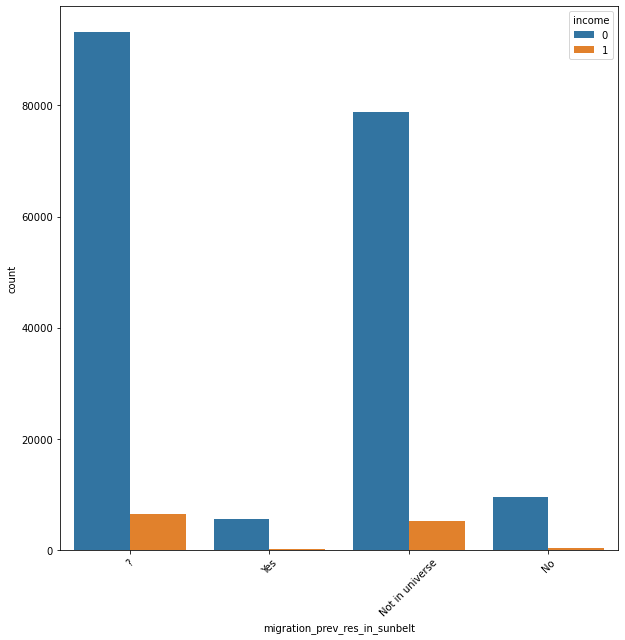

migration_prev_res_in_sunbelt     ratio  counts  mean_incopme
?                                           ?  0.499672   99696      0.065630
Not in universe               Not in universe  0.421275   84054      0.062115
No                                         No  0.050054    9987      0.042455
Yes                                       Yes  0.028999    5786      0.033529

family_members_under_18


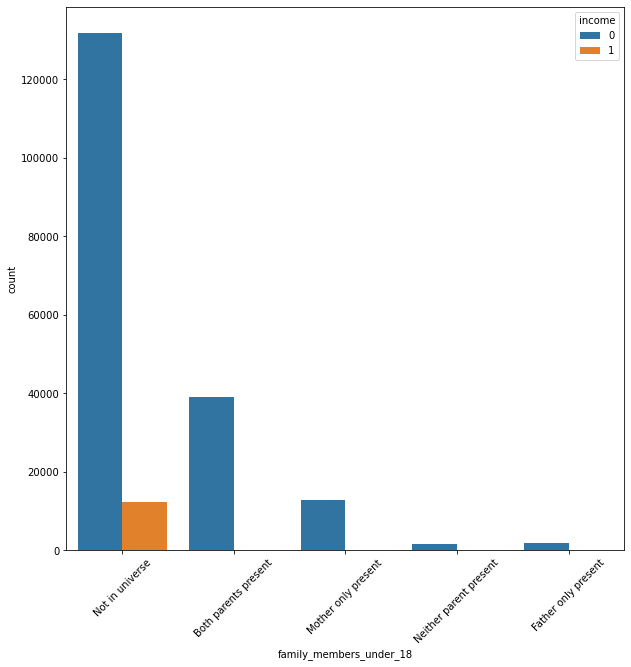

family_members_under_18     ratio  counts  mean_incopme
Not in universe                Not in universe  0.722884  144232      0.085834
Both parents present      Both parents present  0.195381   38983      0.000051
Mother only present        Mother only present  0.064013   12772      0.000000
Father only present        Father only present  0.009438    1883      0.000000
Neither parent present  Neither parent present  0.008285    1653      0.000000

country_of_birth_father


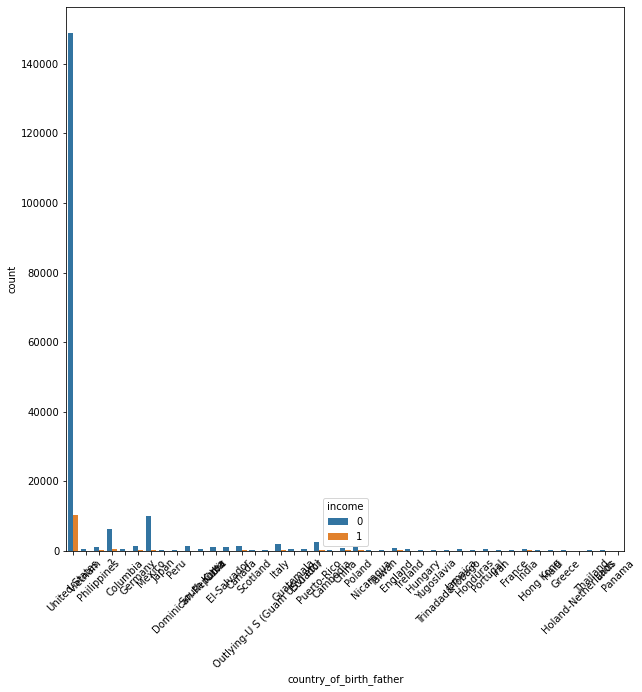

country_of_birth_father     ratio  counts  \
United-States                                United-States  0.797718  159163   
Mexico                                              Mexico  0.050160   10008   
?                                                        ?  0.033645    6713   
Puerto-Rico                                    Puerto-Rico  0.013432    2680   
Italy                                                Italy  0.011086    2212   
Canada                                              Canada  0.006916    1380   
Germany                                            Germany  0.006796    1356   
Dominican-Republic                      Dominican-Republic  0.006465    1290   
Poland                                              Poland  0.006074    1212   
Philippines                                    Philippines  0.005784    1154   
Cuba                                                  Cuba  0.005638    1125   
El-Salvador                                    El-Salvador  0.004922     982   
China                                                China  0.004290     856   
England                                            England  0.003974     793   
Columbia                                          Columbia  0.003077     614   
India                                                India  0.002907     580   
South Korea                                    South Korea  0.002656     530   
Ireland                                            Ireland  0.002546     508   
Jamaica                                            Jamaica  0.002321     463   
Vietnam                                            Vietnam  0.002290     457   
Guatemala                                        Guatemala  0.002230     445   
Japan                                                Japan  0.001965     392   
Portugal                                          Portugal  0.001945     388   
Ecuador                                            Ecuador  0.001900     379   
Haiti                                                Haiti  0.001759     351   
Greece                                              Greece  0.001724     344   
Peru                                                  Peru  0.001679     335   
Nicaragua                                        Nicaragua  0.001579     315   
Hungary                                            Hungary  0.001534     306   
Scotland                                          Scotland  0.001238     247   
Iran                                                  Iran  0.001168     233   
Yugoslavia                                      Yugoslavia  0.001088     217   
Taiwan                                              Taiwan  0.000997     199   
Cambodia                                          Cambodia  0.000982     196   
Honduras                                          Honduras  0.000972     194   
France                                              France  0.000957     191   
Outlying-U S (Guam USVI etc)  Outlying-U S (Guam USVI etc)  0.000797     159   
Laos                                                  Laos  0.000772     154   
Trinadad&Tobago                            Trinadad&Tobago  0.000566     113   
Thailand                                          Thailand  0.000536     107   
Hong Kong                                        Hong Kong  0.000531     106   
Holand-Netherlands                      Holand-Netherlands  0.000256      51   
Panama                                              Panama  0.000125      25   

                              mean_incopme  
United-States                     0.064726  
Mexico                            0.012390  
?                                 0.081782  
Puerto-Rico                       0.024627  
Italy                             0.065099  
Canada                            0.094203  
Germany                           0.081121  
Dominican-Republic                0.010853  
Poland                            0.084158  
Philippines                       0.072790  
Cuba               

country_of_birth_mother


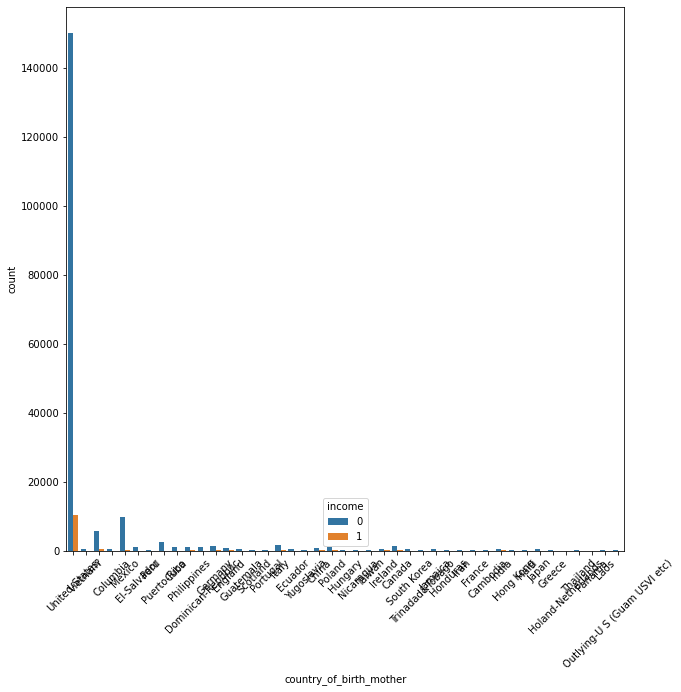

country_of_birth_mother     ratio  counts  \
United-States                                United-States  0.804313  160479   
Mexico                                              Mexico  0.049022    9781   
?                                                        ?  0.030668    6119   
Puerto-Rico                                    Puerto-Rico  0.012395    2473   
Italy                                                Italy  0.009242    1844   
Canada                                              Canada  0.007272    1451   
Germany                                            Germany  0.006927    1382   
Philippines                                    Philippines  0.006170    1231   
Poland                                              Poland  0.005563    1110   
El-Salvador                                    El-Salvador  0.005553    1108   
Cuba                                                  Cuba  0.005553    1108   
Dominican-Republic                      Dominican-Republic  0.005528    1103   
England                                            England  0.004526     903   
China                                                China  0.003809     760   
Columbia                                          Columbia  0.003067     612   
South Korea                                    South Korea  0.003052     609   
Ireland                                            Ireland  0.003002     599   
India                                                India  0.002912     581   
Vietnam                                            Vietnam  0.002371     473   
Japan                                                Japan  0.002351     469   
Jamaica                                            Jamaica  0.002270     453   
Guatemala                                        Guatemala  0.002225     444   
Ecuador                                            Ecuador  0.001879     375   
Peru                                                  Peru  0.001779     355   
Haiti                                                Haiti  0.001769     353   
Portugal                                          Portugal  0.001714     342   
Nicaragua                                        Nicaragua  0.001509     301   
Hungary                                            Hungary  0.001489     297   
Greece                                              Greece  0.001308     261   
Scotland                                          Scotland  0.001208     241   
Taiwan                                              Taiwan  0.001113     222   
Honduras                                          Honduras  0.001093     218   
France                                              France  0.001063     212   
Iran                                                  Iran  0.000992     198   
Yugoslavia                                      Yugoslavia  0.000887     177   
Cambodia                                          Cambodia  0.000787     157   
Outlying-U S (Guam USVI etc)  Outlying-U S (Guam USVI etc)  0.000787     157   
Laos                                                  Laos  0.000777     155   
Thailand                                          Thailand  0.000616     123   
Hong Kong                                        Hong Kong  0.000536     107   
Trinadad&Tobago                            Trinadad&Tobago  0.000496      99   
Holand-Netherlands                      Holand-Netherlands  0.000246      49   
Panama                                              Panama  0.000160      32   

                              mean_incopme  
United-States                     0.064731  
Mexico                            0.013905  
?                                 0.076647  
Puerto-Rico                       0.021431  
Italy                             0.055857  
Canada                            0.093728  
Germany                           0.087554  
Philippines                       0.064175  
Poland                            0.086486  
El-Salvador                       0.018051  
Cuba               

country_of_birth_self


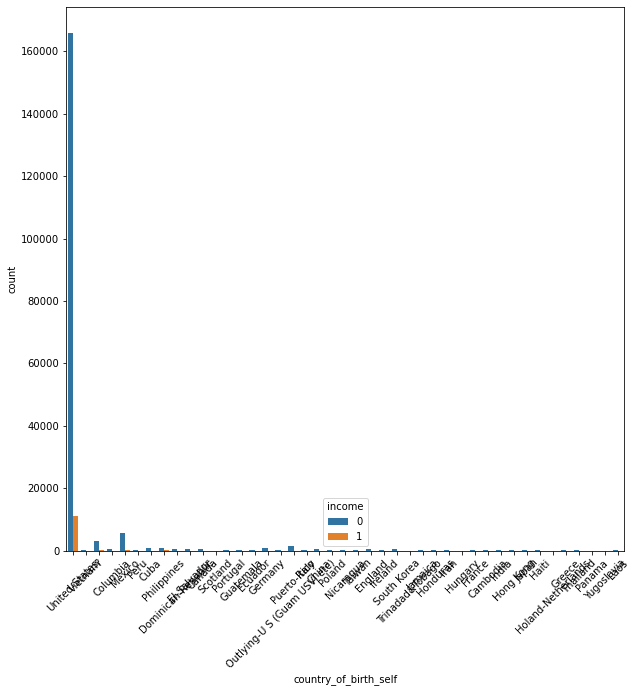

country_of_birth_self     ratio  counts  \
United-States                                United-States  0.887061  176989   
Mexico                                              Mexico  0.028904    5767   
?                                                        ?  0.017006    3393   
Puerto-Rico                                    Puerto-Rico  0.007017    1400   
Germany                                            Germany  0.004265     851   
Philippines                                    Philippines  0.004235     845   
Cuba                                                  Cuba  0.004195     837   
Canada                                              Canada  0.003508     700   
Dominican-Republic                      Dominican-Republic  0.003458     690   
El-Salvador                                    El-Salvador  0.003453     689   
China                                                China  0.002396     478   
South Korea                                    South Korea  0.002361     471   
England                                            England  0.002290     457   
Columbia                                          Columbia  0.002175     434   
Italy                                                Italy  0.002100     419   
India                                                India  0.002045     408   
Vietnam                                            Vietnam  0.001960     391   
Poland                                              Poland  0.001910     381   
Guatemala                                        Guatemala  0.001724     344   
Japan                                                Japan  0.001699     339   
Jamaica                                            Jamaica  0.001604     320   
Peru                                                  Peru  0.001343     268   
Ecuador                                            Ecuador  0.001293     258   
Haiti                                                Haiti  0.001143     228   
Nicaragua                                        Nicaragua  0.001093     218   
Taiwan                                              Taiwan  0.001007     201   
Portugal                                          Portugal  0.000872     174   
Iran                                                  Iran  0.000787     157   
Greece                                              Greece  0.000737     147   
Honduras                                          Honduras  0.000722     144   
Ireland                                            Ireland  0.000677     135   
France                                              France  0.000606     121   
Outlying-U S (Guam USVI etc)  Outlying-U S (Guam USVI etc)  0.000596     119   
Thailand                                          Thailand  0.000566     113   
Laos                                                  Laos  0.000526     105   
Hong Kong                                        Hong Kong  0.000501     100   
Cambodia                                          Cambodia  0.000476      95   
Hungary                                            Hungary  0.000396      79   
Scotland                                          Scotland  0.000376      75   
Trinadad&Tobago                            Trinadad&Tobago  0.000331      66   
Yugoslavia                                      Yugoslavia  0.000331      66   
Panama                                              Panama  0.000140      28   
Holand-Netherlands                      Holand-Netherlands  0.000115      23   

                              mean_incopme  
United-States                     0.062993  
Mexico                            0.013005  
?                                 0.087533  
Puerto-Rico                       0.021429  
Germany                           0.084606  
Philippines                       0.092308  
Cuba                              0.071685  
Canada                            0.098571  
Dominican-Republic                0.015942  
El-Salvador                       0.018868  
China                

citizenship


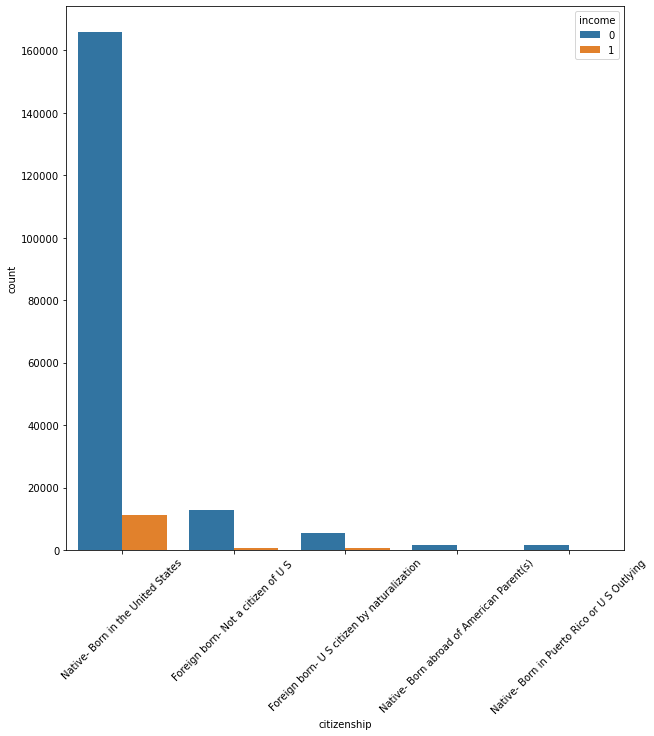

citizenship  \
Native- Born in the United States                      Native- Born in the United States   
Foreign born- Not a citizen of U S                   Foreign born- Not a citizen of U S    
Foreign born- U S citizen by naturalization  Foreign born- U S citizen by naturalization   
Native- Born abroad of American Parent(s)      Native- Born abroad of American Parent(s)   
Native- Born in Puerto Rico or U S Outlying  Native- Born in Puerto Rico or U S Outlying   

                                                ratio  counts  mean_incopme  
Native- Born in the United States            0.887076  176992      0.062992  
Foreign born- Not a citizen of U S           0.067165   13401      0.036714  
Foreign born- U S citizen by naturalization  0.029345    5855      0.099061  
Native- Born abroad of American Parent(s)    0.008801    1756      0.072893  
Native- Born in Puerto Rico or U S Outlying  0.007613    1519      0.021725

fill_inc_questionnaire_for_veteran's_admin


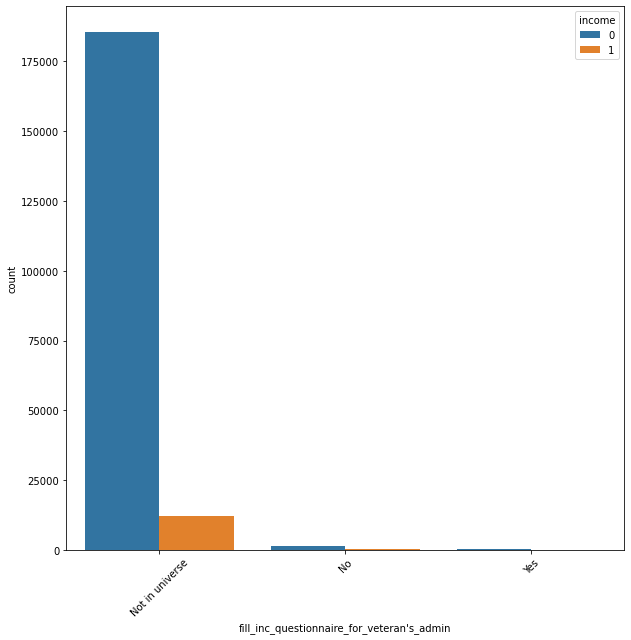

fill_inc_questionnaire_for_veteran's_admin     ratio  counts  \
Not in universe                            Not in universe  0.990056  197539   
No                                                      No  0.007984    1593   
Yes                                                    Yes  0.001960     391   

                 mean_incopme  
Not in universe      0.061512  
No                   0.134965  
Yes                  0.040921

In [34]:
plot_categorical_ratios(train)

In [ ]:
plot_categorical_ratios(test)

<b>Notes</b><br/><br/>
Values to be reaplace by np.nan:<br/>
<li>Not in universe</li>
<li>Not identifiable</li>
<li>?</li>
<li>Not in universe & Not identifiable</li><br/>

Columns to be transformed:<br/>
<li>detailed_household_and_family_stat -> lot of categorical values, which will create multiple columns during onehot encoding. Moreover it is redundant with "detailed_household_summary_in_household". This column will be replaced by frequencies<br/></li>
<li>age -> create age categories<br/></li>
<li>hispanic_origin -> create boolean hispanic origin yes / no<br/></li>
<li>sex & age -> create specific category<br/></li>
<li>reason_for_unemployment -> create boolean unemployment yes / no<br/></li>
<li>countries variable -> Too much values, will be first dropped for onehot encoding. Need to try a LabelEncoder otherwise<br/></li>

### Explore missing data

In [4]:
def missing_data(df):
    # replace 'Not in universe', 'Not identifiable' and '?' by null
    df.replace("Not in universe", np.nan, inplace=True)
    df.replace("Not identifiable", np.nan, inplace=True)
    df.replace("?", np.nan, inplace=True)

    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.shape[0]*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values["Types"] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(missing_values)
missing_datas = missing_data(train)

Columns which are empty more than 51% will be droped<br/>
Other missing values will be filled using <b>IterativeImputer</b> for numeric columns and <b>SimpleImputer</b> for categorical columns

In [5]:
empty_cols = missing_datas[missing_datas["Percent"] >= 51].index
print(empty_cols)

Index(['fill_inc_questionnaire_for_veteran's_admin', 'reason_for_unemployment',
       'enroll_in_edu_inst_last_wk', 'state_of_previous_residence',
       'region_of_previous_residence', 'migration_prev_res_in_sunbelt',
       'member_of_a_labor_union', 'family_members_under_18'],
      dtype='object')


### Visualizing conitnuous data

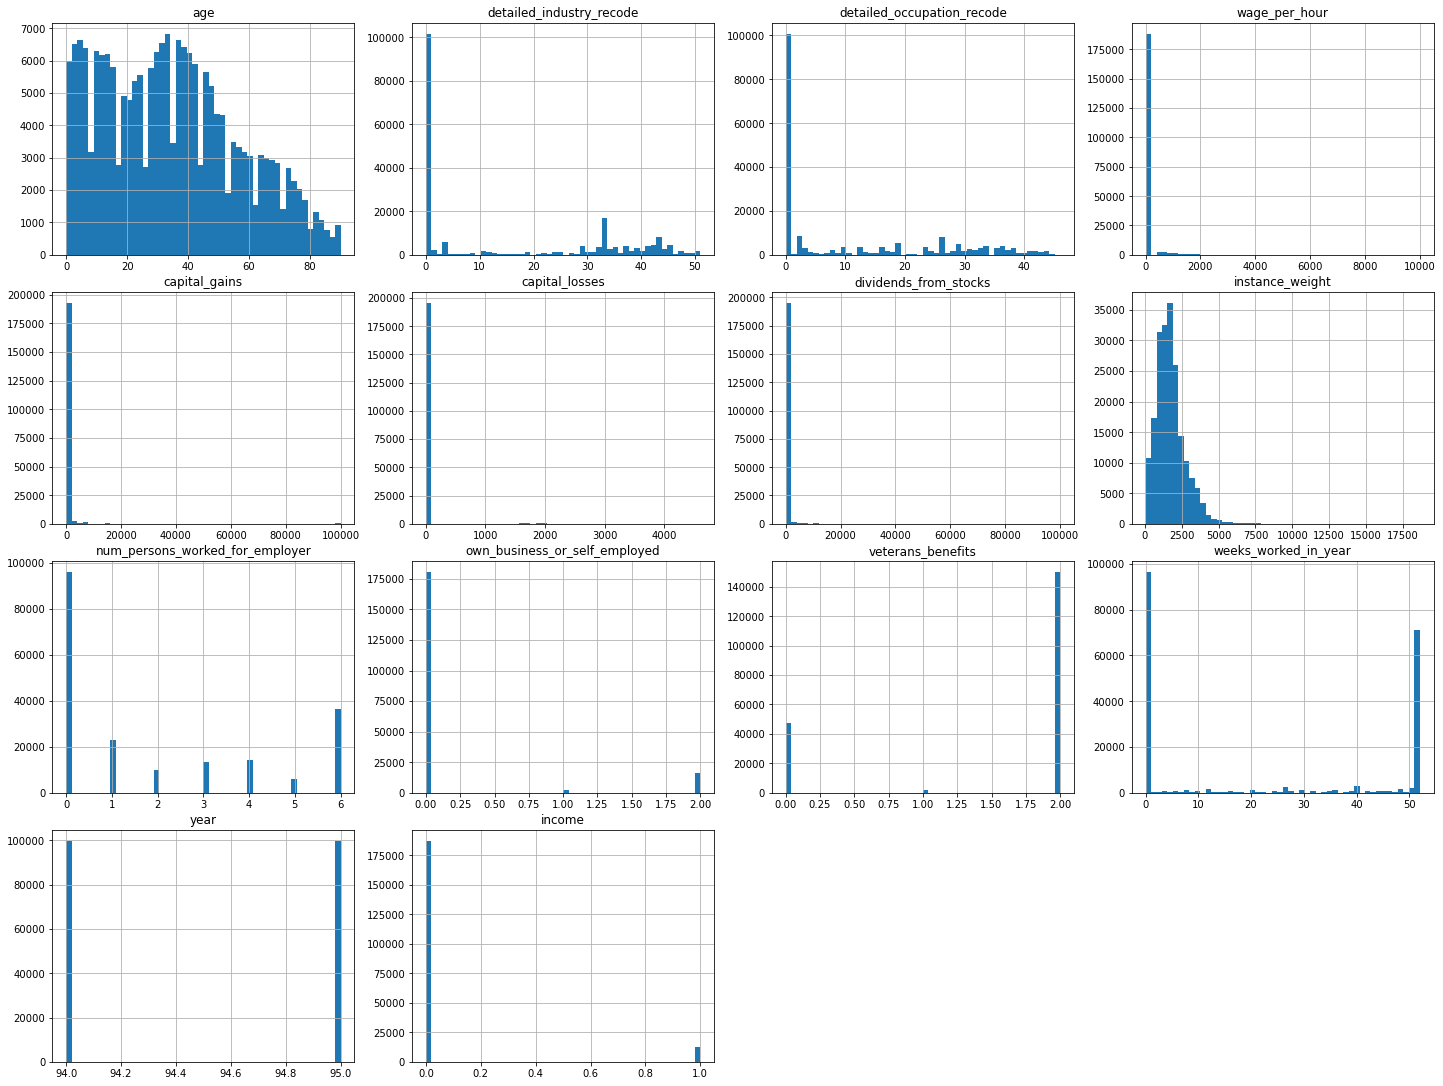

In [6]:
train.select_dtypes(exclude=["object"]).hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<b>Notes</b><br/>
Some continuous / numeric values are skewed, they might need to be normalized / standardized

### Plotting correlation matrice

<AxesSubplot:>

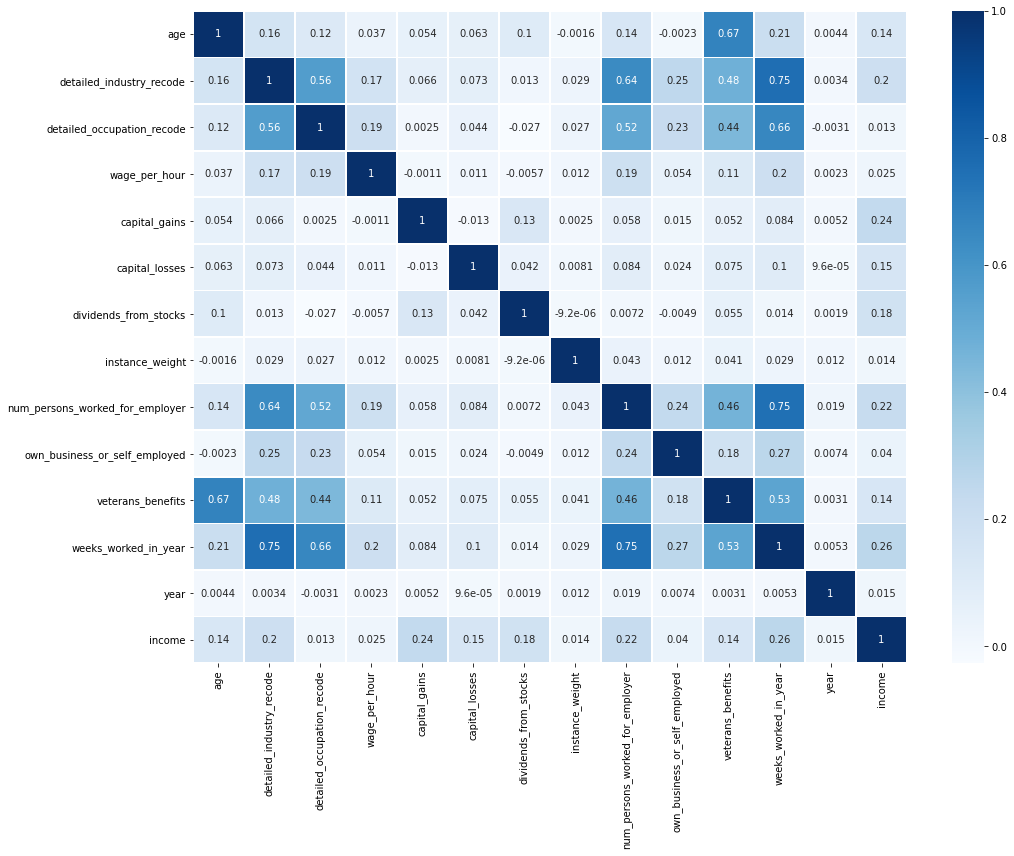

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), cmap="Blues", linewidths=0.75, annot=True)

The main features related to "Income" are<br/>
<ol>
<li>weeks_worked_in_year</li>
<li>capital_gains</li>
<li>num_persons_worked_for_employer</li>
<li>detailed_industry_recode</li>
<li>dividends_from_stocks</li>
<li>capital_losses</li>
<li>age</li>
<li>veterans_benefits</li>
</ol>

### Features comparisons

In [33]:
import plotly.graph_objs as go

In [29]:
train_sup = train[train["income"] == 1]
train_inf = train[train["income"] == 0]

In [30]:
def show_feature_comparison(col):
    train_sup_col = train_sup[col].value_counts()
    train_sup_col = pd.DataFrame({col:train_sup_col.index, 'count':train_sup_col.values})

    train_inf_col = train_inf[col].value_counts()
    train_inf_col = pd.DataFrame({col:train_inf_col.index, 'count':train_inf_col.values})

    pie_sup = go.Pie(  
       labels = train_sup_col[col],
       values = train_sup_col["count"],
       domain=dict(x=[0, 0.5]),
       name="Above 50k",
       hole = 0.5,
       marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
    )

    pie_inf = go.Pie(  
       labels = train_inf_col[col],
       values = train_inf_col["count"],
       domain=dict(x=[0.5, 1.0]), 
       name="Below 50k",
       hole = 0.5,
       marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
    )

    data = [pie_sup, pie_inf]

    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title=col + ' percentage from +50k vs -50k',
        annotations=[dict(text="Above 50k", x=0.18, y=0.5, font_size=15, showarrow=False),
                     dict(text="Below 50k", x=0.85, y=0.5, font_size=15, showarrow=False)]
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

In [34]:
show_feature_comparison("sex")

In [35]:
show_feature_comparison("race")

<b>Notes</b><br/>
Some features appears to have considerable difference when considering appart both categories +50k and -50k

## 3) Cleaning, preprocessing, features engineering

In [36]:
missing_values = preprocessing_census.get_missing_data(train)
empty_cols = missing_values[missing_values["Percent"] >= 51].index

df, target, categorical_columns, numeric_columns = preprocessing_census.feature_transform(train, empty_cols)

Categorical columns:
 ['class_of_worker', 'education', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'sex', 'full_or_part_time_employment_stat', 'tax_filer_status', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'citizenship', 'sexCat']

Numeric columns:
 ['age', 'detailed_industry_recode', 'detailed_occupation_recode', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'instance_weight', 'num_persons_worked_for_employer', 'own_business_or_self_employed', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'ageCat', 'hispanicCat', 'unemployment', 'household_Frequency']


## 4) Testing Models

Models will be fitted using <b>run_model.py</b> or <b>run_model_pca.py.</b><br/> A pipeline is instanciated to test different preprocessing methods (with different imputer / encoder / imbalanced correction methods / PCA).<br/>
At the end of the pipeline a GridSearch is used to try finding the best parameters for the considered model.<br/>
The models were trained on the train dataset.

In [46]:
import run_model
import make_prediction

### A. LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clr = LogisticRegression()

clr_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

In [ ]:
results = run_model.fit_model(clr, df, target, numeric_columns, categorical_columns, clr_param_grid)

#### Results
Note : run without imbalanced correction<br/><br/>

Best estimator : LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')<br/>
Best score : 0.9521857771342652

F1 score : 0.9729784327172012


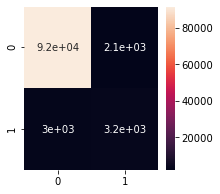

In [24]:
array = [[91513,2063],[3020,3166]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*91513 / (2*91513 + 3020 + 2063)))

<b>Confusion Matrix</b><br/>
[[91513  2063]<br/>
 [ 3020  3166]]<br/><br/>
<b>accuracy:</b> 0.9490487359916602<br/>
<b>sensitivity:</b> 0.6054694970357621<br/>
<b>specificity:</b> 0.9680534839685613<br/>

### B. RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
import run_model_pca

In [43]:
clf = RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=28)

clf_param_grid = {"max_depth": [5, None],
              "max_features": [3,7,9],
              "min_samples_split": [4,7,9],
              "min_samples_leaf": [10,20,25],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
results = run_model.fit_model(clf, df, target, numeric_columns, categorical_columns, clf_param_grid)
#results = run_model_pca.fit_model(clf, df, target, numeric_columns, categorical_columns, clf_param_grid)

In [ ]:
make_prediction.get_model_performances(results, test, empty_cols)

### #Results

<b>1. Without imbalanced correction</b><br/><br/>

Best estimator : RandomForestClassifier(bootstrap=False, max_features=9, min_samples_leaf=10,
                       min_samples_split=4, n_estimators=50, n_jobs=-1,
                       random_state=28)<br/><br/>

F1 score : 0.974990715021787


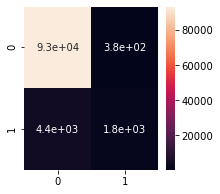

In [22]:
array = [[93194,382],[4399,1787]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*93194 / (2*93194 + 4399 + 382)))

<b>Confusion Matrix</b><br/>
[[93194   382]<br/>
 [ 4399  1787]]<br/><br/>
<b>accuracy:</b> 0.9520759407389587<br/>
<b>sensitivity:</b> 0.8238819732595666<br/>
<b>specificity:</b> 0.9549250458536985<br/>
<br/>
<b>2. With imbalanced correction</b><br/>
Best estimator : RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=9,
                       min_samples_leaf=10, min_samples_split=4,
                       n_estimators=50, n_jobs=-1, random_state=28)<br/><br/>

F1 score : 0.968046587087555


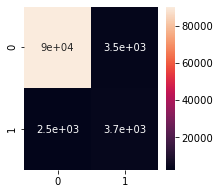

In [23]:
array = [[90099,3477],[2471,3715]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*90099 / (2*90099 + 3477 + 2471)))

<b>Confusion Matrix</b><br/>
[[90099  3477]<br/>
 [ 2471  3715]]<br/><br/>
<b>accuracy:</b> 0.9403780998777089<br/>
<b>sensitivity:</b> 0.5165461624026696<br/>
<b>specificity:</b> 0.9733066868315869<br/>
<br/>
<b>3. Without imbalanced correction using PCA (80%)</b><br/>
Best estimator : RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=7,
                       min_samples_leaf=25, min_samples_split=4,
                       n_estimators=50, n_jobs=-1, random_state=28)<br/><br/>

F1 score : 0.9701389358130058


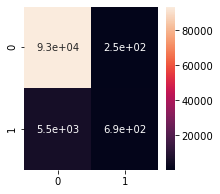

In [25]:
array = [[93323,253],[5492,694]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*93323 / (2*93323 + 253 + 5492)))

<b>Confusion Matrix</b><br/>
[[93323   253]<br/>
 [ 5492   694]]<br/><br/>
<b>accuracy:</b> 0.9424129428038732<br/>
<b>sensitivity:</b> 0.7328405491024287<br/>
<b>specificity:</b> 0.9444213935131306<br/>

### C. XGBClassifier

In [44]:
from xgboost import XGBClassifier

In [45]:
xgb = XGBClassifier(eta=0.8, gamma=0.8, max_depth=None, n_estimators=40)

gbm_param_grid = {
    'n_estimators': [20, 30, None],
    'max_depth': [5, None],
    'learning_rate': [.4, .5, .6],
    'colsample_bytree': [.7, .9]
}

In [ ]:
results = run_model.fit_model(xgb, df, target, numeric_columns, categorical_columns, gbm_param_grid)

In [ ]:
make_prediction.get_model_performances(results, test, empty_cols)

#### Results
<b>1. Without imbalanced correction</b><br/><br/>

F1 score : 0.9767968964135866


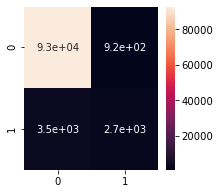

In [26]:
array = [[92657,919],[3483,2703]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*92657 / (2*92657 + 919 + 3483)))

<b>Confusion Matrix</b><br/>
[[92657   919]<br/>
 [ 3483  2703]]<br/><br/>
<b>accuracy:</b> 0.9558749824582506<br/>
<b>sensitivity:</b> 0.7462727774710105<br/>
<b>specificity:</b> 0.9637715831079675<br/>
<br/>
<b>2. With imbalanced correction</b><br/>

F1 score : 0.9664181509571794


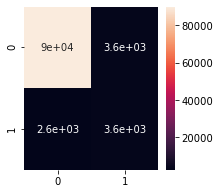

In [27]:
array = [[89960,3616],[2636,3550]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
print("F1 score : " + str(2*89960 / (2*89960 + 3616 + 2636)))

<b>Confusion Matrix</b><br/>
[[89960  3616]<br/>
 [ 2636  3550]]<br/><br/>
<b>accuracy:</b> 0.9373308474168521<br/>
<b>sensitivity:</b> 0.495394920457717<br/>
<b>specificity:</b> 0.9715322476132878<br/>

### D. SVC

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC(C=1, gamma=1)

svc_param_grid = {
    'kernel':('linear', 'rbf'),
    'C':(1,0.5,0.75),
    'gamma': (1,3,'auto'),
    'shrinking':(True,False)}

In [ ]:
results = run_model.fit_model(svc, df, target, numeric_columns, categorical_columns, svc_param_grid)

In [ ]:
make_prediction.get_model_performances(results, test, empty_cols)

#### Results
NA<br/>
SVC training never finished. Its training needs to be accelerated, either by introducing a smaller param_grid, or by reducing the number of features

### E. StackingClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [51]:
clf = RandomForestClassifier(bootstrap=False, max_features=9, min_samples_leaf=10,
                       min_samples_split=4, n_estimators=50, n_jobs=-1,
                       random_state=28)
xgb = XGBClassifier(eta=0.8, gamma=0.8, max_depth=None, n_estimators=40)
svc = SVC(C=1, gamma=1)

In [52]:
stc = StackingClassifier(estimators=[('svc', svc),
                               ('rf', clf),
                               ('xgb', xgb)],
                   final_estimator=LogisticRegression(C=1))

In [53]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [54]:
imputer = IterativeImputer(max_iter=30, random_state=42)
scaler = MinMaxScaler()

frequent = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
onehot = OneHotEncoder()

preprocess = make_column_transformer(
    (make_pipeline(imputer, scaler), numeric_columns),
    (make_pipeline(frequent, onehot), categorical_columns)
)

pipe = make_pipeline(preprocess, stc)

In [ ]:
scores = cross_val_score(pipe, df, target, scoring='accuracy')

#### Results
The StackingClassifier has been used with the best models found previously.<br/>
Its evaulation used cross-validation with an accuracy scoring. <br/>
However it has not been able to finish, maybe because of the SVM classifier wich performs badly

## 5) Model with highest performance

The best model appears to be the XGBClassifier without imbalanced correction achieving a <b>0.956</b> accuracy / <b>0.977</b> F1 score on test data<br/>
The second best model is the RandomForestClassifier without imbalanced correction achieving a <b>0.952</b> accuracy / <b>0.975</b> F1 score on test data<br/>
The third best model is the LogisticRegressionClassifier achieving a <b>0.949</b> accuracy / <b>0.973</b> F1 score on test data<br/>
<b>Notes</b>
<li>Imbalance correction seems not to work well and its preprocessing is time consuming. Remaining empty columns might not influence the output that much.</li>
<li>Normalization and standardization have not been tested, this could improve linear models</li>
<li>ROC curves could have been explore to evaluate models performances</li>

## 6) Apply best model

All output scores has been used with the test data